In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-11-26 09:25:38.146119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the dataset
df = pd.read_csv('Data/features_30_sec.csv')
df = df.drop(labels='filename', axis=1)

df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
# Encode class labels
class_list = df.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(class_list)

/Users/sacha/opt/anaconda3/envs/erdos_2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sacha/opt/anaconda3/envs/erdos_2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [4]:
# Standardize feature data
X = StandardScaler().fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Define a function to create and train the model
def create_and_train_model(input_shape, num_classes, epochs=50, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=input_shape),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(num_classes, activation='softmax'),
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy')
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=32)
    
    return model, history

In [7]:
# Define a function to plot validation metrics
def plot_validation(history):
    max_val_accuracy = max(history.history["val_accuracy"])
    print("Validation Accuracy:", max_val_accuracy)
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

In [8]:
# Create and train the model
input_shape = (X_train.shape[1],)
num_classes = len(label_encoder.classes_)
model, model_history = create_and_train_model(input_shape, num_classes, epochs=50, optimizer='adam')

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 2.0528 - accuracy: 0.2937 - val_loss: 1.5679 - val_accuracy: 0.5050
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 1.5016 - accuracy: 0.4600 - val_loss: 1.1821 - val_accuracy: 0.5800
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 1.2966 - accuracy: 0.5450 - val_loss: 0.9922 - val_accuracy: 0.6550
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0831 - accuracy: 0.6250 - val_loss: 0.8992 - val_accuracy: 0.7050
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.9364 - accuracy: 0.6725 - val_loss: 0.8334 - val_accuracy: 0.7200
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.8101 - accuracy: 0.7212 - val_loss: 0.7853 - val_accuracy: 0.7400
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.7825 - val_loss: 0.7571 - val_accuracy: 0.7600
Epoch 8/50
25/25 [==

Validation Accuracy: 0.800000011920929


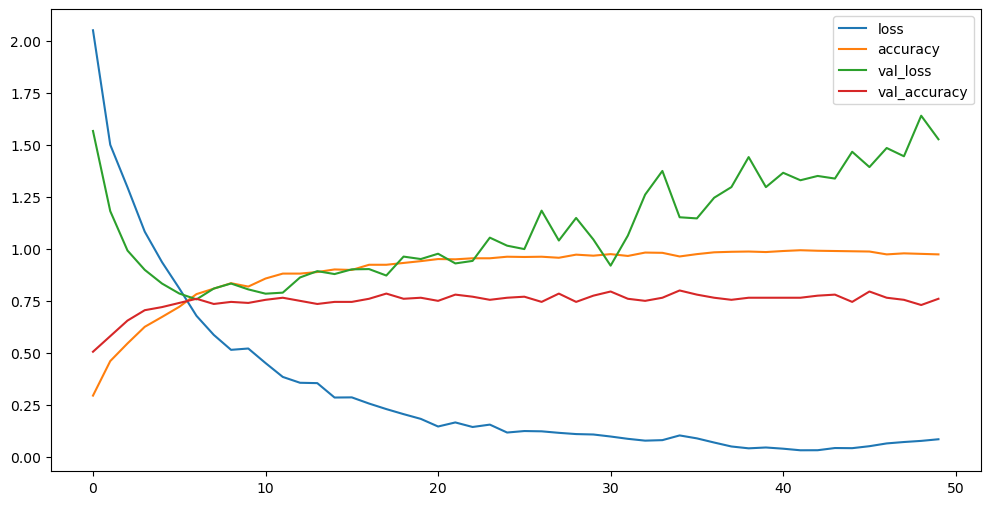

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [9]:
# Plot validation metrics
plot_validation(model_history)

# Display model summary
print(model.summary())